In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cognifyz-technologies-tasks/Dataset .csv


### Imports

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

### Data Collection and Preprocessing

In [89]:
data = pd.read_csv('/kaggle/input/cognifyz-technologies-tasks/Dataset .csv')

In [70]:
# Get cuisines with counts greater than 10
filtered_cuisines = data['Cuisines'].value_counts()[data['Cuisines'].value_counts() > 100]

# Convert the result to a list
filtered_cuisines_list = len(list(filtered_cuisines.index))
print(filtered_cuisines_list)


17


In [71]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [72]:
data['Address'].value_counts()

Address
Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Cyber Hub, DLF Cyber City, Gurgaon                                                        8
                                                                                         ..
23-24, Defence Colony Market, Defence Colony, New Delhi                                   1
28, Main Market, Defence Colony, New Delhi                                                1
Daryaganj, New Delhi                                                                      1
Ground Floor, E-23, Netaji Subhash Marg, Opposite Golcha Cinema, Daryaganj, New Delhi     1
Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul       

In [73]:
rest_name_greater_than_30 = data['Restaurant Name'].value_counts()[data['Restaurant Name'].value_counts() > 47].count()
print(rest_name_greater_than_30)

5


In [74]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [75]:
# Calculate value counts for the 'Cuisines' column
cuisine_counts = data['Cuisines'].value_counts()

# cuisines with count less than 100
cuisines_to_replace = cuisine_counts[cuisine_counts < 200].index

# cuisine with a count greater than 100 (or choose the one with the highest count)
replacement_cuisine = cuisine_counts[cuisine_counts >= 200].index[0] 

# Replace all cuisines with counts less than 100 with the replacement cuisine
data['Cuisines'] = data['Cuisines'].apply(lambda x: replacement_cuisine if x in cuisines_to_replace else x)

In [76]:
# Calculate value counts for the 'Address' column
address_count = data['Address'].value_counts()

# Addresses with count less than 7
address_to_replace = address_count[address_count < 7].index

# Address with a count greater than or equal to 7 (or the most frequent address)
if address_count[address_count >= 7].empty:
    raise ValueError("No addresses with count >= 7 found.")
replacement_address = address_count[address_count >= 7].index[0]

# Replace all addresses with counts less than 7 with the replacement address
data['Address'] = data['Address'].apply(lambda x: replacement_address if x in address_to_replace else x)

In [77]:
columns_to_drop = ['Restaurant ID', 'Locality Verbose', 'Country Code', 
                   'Longitude', 'Latitude']

data = data.drop(columns=columns_to_drop, axis=1)

data.head(3)

,Restaurant Name,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,Makati City,"Dilli Haat, INA, New Delhi","Century City Mall, Poblacion, Makati City",North Indian,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,Makati City,"Dilli Haat, INA, New Delhi","Little Tokyo, Legaspi Village, Makati City",North Indian,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Dilli Haat, INA, New Delhi","Edsa Shangri-La, Ortigas, Mandaluyong City",North Indian,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [78]:
print(len(data.columns))

16


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Address               9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   object 
 7   Has Table booking     9551 non-null   object 
 8   Has Online delivery   9551 non-null   object 
 9   Is delivering now     9551 non-null   object 
 10  Switch to order menu  9551 non-null   object 
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   object 
 14  Rating text           9551 non-null   object 
 15  Votes                

In [80]:
data.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [81]:
# Strip spaces from column names
data.columns = data.columns.str.strip()

# Columns to encode
columns_to_encode = ['Restaurant Name', 'City', 'Locality', 'Cuisines', 
                     'Currency', 'Has Table booking', 'Has Online delivery', 
                     'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Address']

# Initialize LabelEncoders
encoders = {}
for col in columns_to_encode:
    encoders[col] = LabelEncoder()
    data[col] = encoders[col].fit_transform(data[col])

### Spliting Data into training and test set

In [82]:
X = data.drop(['Cuisines'], axis=1)

# Target Variable
y = data['Cuisines'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training 

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
data.head(3)

,Restaurant Name,City,Address,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,73,3,171,4,1100,0,1,0,0,0,3,4.8,0,1,314
1,3172,73,3,593,4,1200,0,1,0,0,0,3,4.5,0,1,591
2,2896,75,3,308,4,4000,0,1,0,0,0,4,4.4,1,5,270


In [87]:
models = {
    'Random Forest Classifier': RandomForestClassifier(
        n_estimators=50,
        max_depth=None,
        random_state=42,
        criterion='gini',
        max_features='sqrt',
    )
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate Model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Results
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

Results for Random Forest Classifier:
Accuracy: 0.80
Precision: 0.73
Recall: 0.80
F1 Score: 0.74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.2f}")

Random Forest Classifier Cross-Validation Accuracy: 0.78


In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

classes = data['Cuisines'].unique()

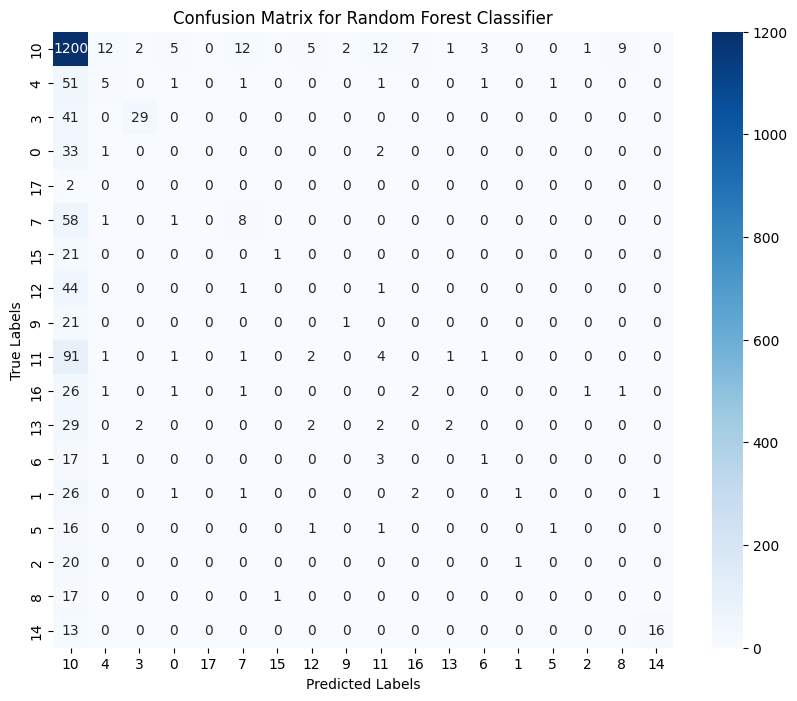

In [53]:
plot_confusion_matrix(y_test, y_pred, classes, model_name="Random Forest Classifier")

### Model Performance Analysis

Performance Metrics:
Accuracy: 0.80

80% of the predictions align with the true labels, indicating a good overall performance.
Precision: 0.73

Of all cuisine predictions made, 73% are correct. A lower precision compared to accuracy suggests some degree of false positives.
Recall: 0.80

The model successfully identifies 80% of the true instances for each class. High recall is positive but indicates potential challenges in correctly distinguishing some cuisines.
F1 Score: 0.74

This harmonic mean of precision and recall confirms a good balance between the two metrics. However, a slight gap between precision and recall points to some areas for improvement.

### Model Challenges and Biases

Challenges Identified
Class Imbalance:

If some cuisines are underrepresented, the model might struggle to generalize for these classes.
Dominant classes may overshadow rare cuisines, causing classification bias.
Feature Overlap:

Shared attributes (e.g., common spices or cooking methods) may confuse the classifier and lead to misclassifications.
Data Representation:

The features may not fully capture the nuances that distinguish cuisines. For instance, ingredient lists might miss context about preparation styles or cultural influences.
False Positives in Similar Classes:

The relatively lower precision suggests the model struggles with false positives, especially in cuisines that are similar or frequently co-occur in the dataset.
